In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from scipy.stats import shapiro

In [2]:
# !pip install threadpoolctl==3.1.0

# Домашнее задание по курсу анализа данных
Версия от 12.10.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 30.10.2021  23:59**

**Жесткий дедлайн: 6.11.2021  23:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [3]:
df = pd.read_csv('../data/people_data_clustering.csv', index_col=0)
print('Размеры',df.shape)
df.head()

Размеры (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `childrens` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол
* `age` - Возраст
* `home_cost` - Стоимость жилья
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Изучение датасета (5 баллов)
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки бинарные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   float64
 2   salary       6000 non-null   float64
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   float64
 5   profession   6000 non-null   object 
 6   home_cost    6000 non-null   float64
 7   drive_info   3230 non-null   float64
 8   happyness    6000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 468.8+ KB


In [5]:
df.describe()

,was_married,children,salary,sex,age,home_cost,drive_info,happyness
count,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6.000000e+03,3230.000000,6000.000000
mean,0.842000,2.887167,8.463445e+07,0.661833,31.776667,1.019184e+07,0.729102,0.460160
std,0.364771,2.850285,8.022130e+07,0.473125,32.546372,3.120066e+05,0.444492,0.153727
min,0.000000,0.000000,1.765712e+06,0.000000,2.000000,9.824378e+06,0.000000,0.000000
25%,1.000000,1.000000,1.092669e+07,0.000000,10.000000,1.009639e+07,0.000000,0.351787
50%,1.000000,2.000000,4.301600e+07,1.000000,17.000000,1.017716e+07,1.000000,0.451588
75%,1.000000,4.000000,1.588318e+08,1.000000,32.000000,1.026920e+07,1.000000,0.562556
max,1.000000,9.000000,3.459271e+08,1.000000,100.000000,2.065792e+07,1.000000,1.000000


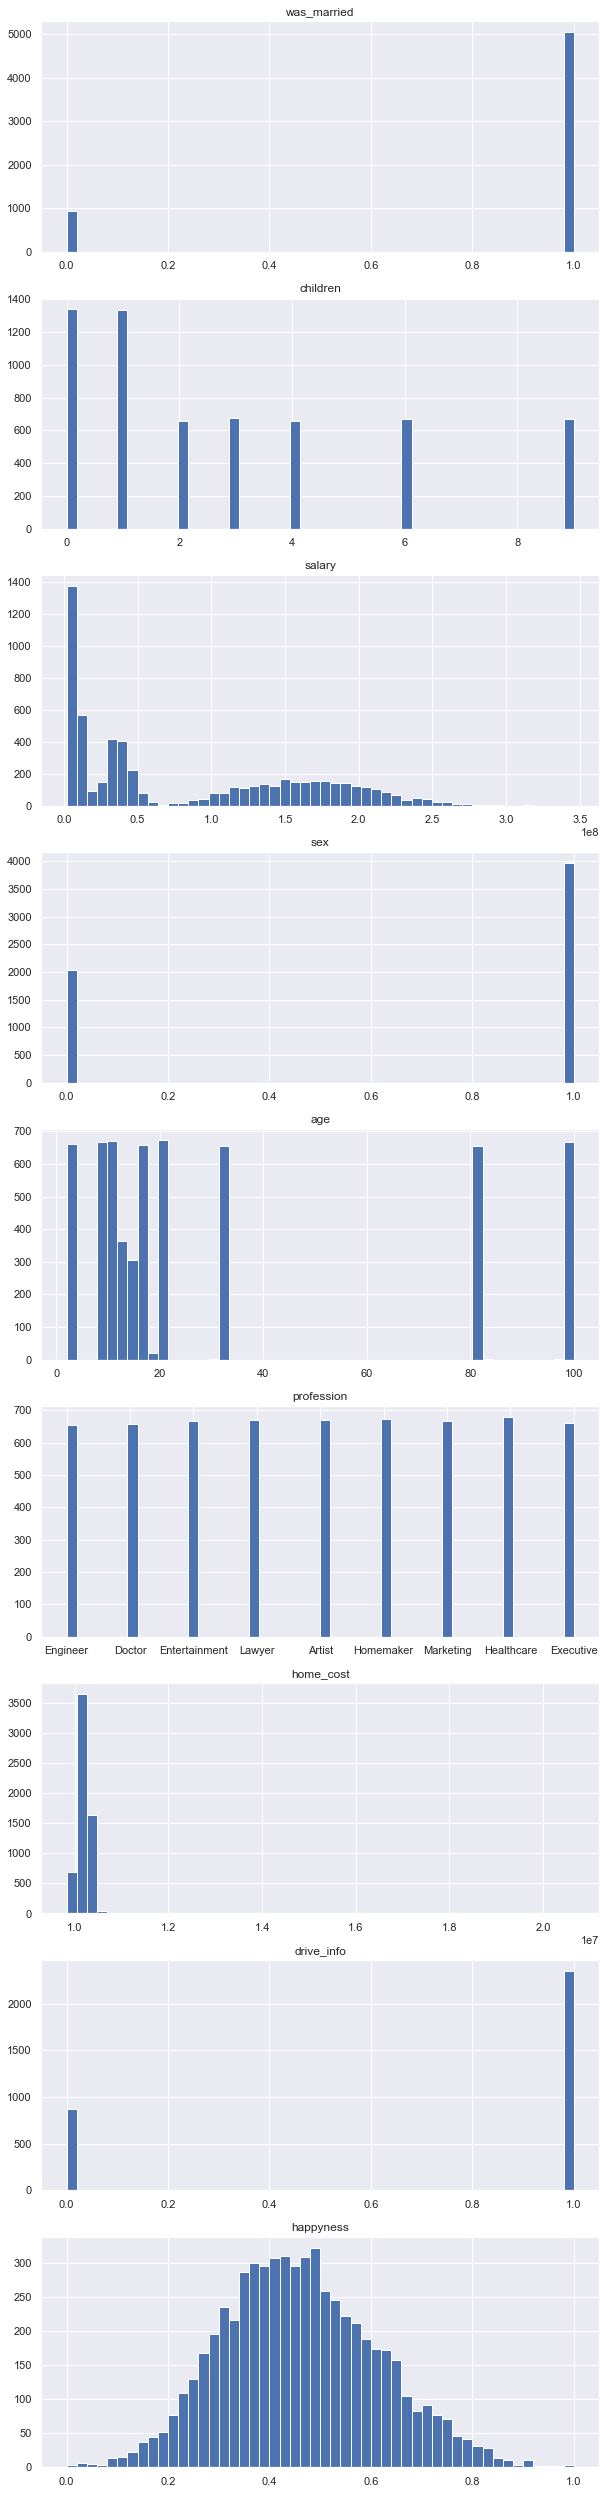

In [6]:
fig, axes = plt.subplots(df.shape[1], figsize = (10, 5 * df.shape[1]))

for i, c in enumerate( df.columns):
    axes[i].hist(df[c], bins = 50)
    axes[i].set_title(c)

### Проверка нормальности распределений

In [7]:
for c in df.columns:
    try:
        if shapiro(df[c])[1] < 0.05:
            print(f"{c}: p-value = {shapiro(df[c])[1]}")
        else:
            print(f"{c}: p-value = {shapiro(df[c])[1]}. Нулевую гипотезу нормальности распределения нельзя отвергнуть на уровне значимости 0.05")
            
    except ValueError:
        print(f'{c}:нельзя посчитать статистику без преобразования признака')

was_married: p-value = 0.0
children: p-value = 0.0
salary: p-value = 0.0
sex: p-value = 0.0
age: p-value = 0.0
profession:нельзя посчитать статистику без преобразования признака
home_cost: p-value = 0.0
drive_info: p-value = 1.0. Нулевую гипотезу нормальности распределения нельзя отвергнуть на уровне значимости 0.05
happyness: p-value = 1.9584418722157215e-12


C:\Users\ASirotkina\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Проверим корреляции

* Какие признаки численные? **'children', 'salary', 'age', 'home_cost', 'happyness'**
* Какие признаки категориальные? **'profession'**
* Какие признаки бинарные? **'was_married', 'sex','drive_info'**
* Какие признаки имеют нормальное распределение? **"drive_info"**
* Какие признаки бессмысленные? **"drive_info" - почти половина пропусков**

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? 
* Есть ли пропуски в данных? 
* Как стоит поступить с выбросами? (удалить или заменить \ `dropna()` или `fillna()` )
* Удалить бесмысленные признаки (`drop()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

### Проверка дубликатов

In [8]:
if len(df) == len(df.drop_duplicates()):
    print('Дубликатов нет')
else:
    print('В данных есть дубликаты')

Дубликатов нет


### Проверка пропусков

In [9]:
if len(df) == len(df.dropna()):
    print('Пропусков нет')
else:
    print('В данных есть пропуски')

В данных есть пропуски


* Есть ли дубли в данных? **нет**
* Есть ли пропуски в данных? **да**
* Как стоит поступить с выбросами? (удалить или заменить \ `dropna()` или `fillna()` ) **Пропуски есть только для признака "drive_info" и их практически половина, так что нужно либо заменить, либо вообще убрать этот признак**

In [10]:
df.drop( "drive_info", axis = 1, inplace = True) #Удалить бесмысленные признаки (drop())

### Поиск выбросов
За выбросы будем считать значения выходящие за 2 стандартных отклонения

In [11]:
lower_bound = df['home_cost'].mean() - 2 * df['home_cost'].std()
upper_bound = df['home_cost'].mean() + 2 * df['home_cost'].std()
count = len(df[(df['home_cost'] < lower_bound) | (df['home_cost'] > upper_bound)])
print(f'Количество выбросов = {count}')

Количество выбросов = 5


### Удаление выбросов

In [12]:
df = df[(df['home_cost'] >= lower_bound) & (df['home_cost'] <= upper_bound)]

# Изучение зависимых признаков (5 балла). 
* Построить матрицу корреляций
* Визуализировать матрицу корреляции с помощью heatmap
* Сделать выводы по самым скоррелированные признакам
* Построить график зависимости между двумя самыми зависимыми признаками



<AxesSubplot:>

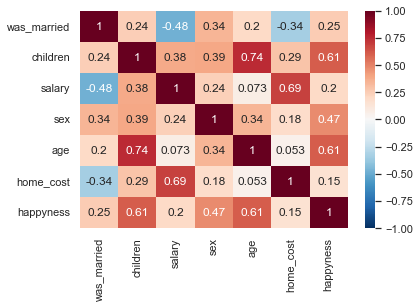

In [13]:
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'RdBu_r')

**Выводы по самым скоррелированные признакам:**
1. Чем старше, тем больше детей
2. Чем больше детей, тем счастливее человек
3. Счастье приходит с возрастом
4. Чем больше зарплата, тем дороже дом

### График зависимости между двумя самыми зависимыми признаками

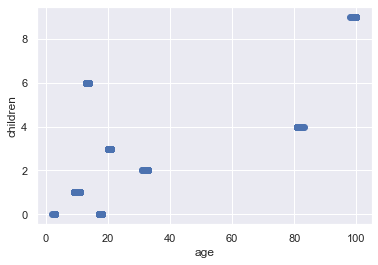

In [14]:
plt.plot(df['age'], df['children'], 'o')
plt.xlabel('age')
plt.ylabel('children')
plt.show()

# Нормировка признаков (3 балла)
* Отнормировать данные
* Обосновать выбор нормировки

**Перед нормировкой необходимо преобразовать категориальные признаки (хотя бы те, что заданы строкой)** \
Так как мы вроде как не гонимся за точностью, будем использовать LabelEncoder, хотя в реальной задаче я бы взяла OneHot, либо Label но не со случайными значениями, а чтобы значения соответсвовали например частоте встречаемости каждой категории.

In [15]:
# Вспомогательные код

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

le = LabelEncoder()
df['profession'] = le.fit_transform(df['profession'])

In [16]:
normal_data = pd.DataFrame()

sc = StandardScaler()
normal_data[df.columns] = sc.fit_transform(df)

**Так как мы убрали выбросы, можем использовать StandardScaler или MinMaxScaler**

# Выделить кластеры (6 баллов)
* Определить оптимальное количество кластеров с помощью правила локтя/осыпи
* Получить номера класстеров для каждого пользователя. 

In [17]:
# Вспомогательные код

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

answ_dict =  {}
for n_clusters in range(2, 15):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, max_iter=500)
    cluster_labels = clusterer.fit_predict(normal_data)
    print(n_clusters, silhouette_score(normal_data, cluster_labels))
    answ_dict[n_clusters] = silhouette_score(normal_data, cluster_labels)

2 0.366115136590258
3 0.4271875666286687
4 0.45424365486195556
5 0.44186931173507416
6 0.46215746285625126
7 0.48198350472889906
8 0.4810130251685662
9 0.4700164863537414
10 0.42577360149625704
11 0.3856833842970959
12 0.4051138940425905
13 0.3724445977861764
14 0.3616068751465794


In [19]:
sorted_dict = {}
sorted_keys = sorted(answ_dict, key=answ_dict.get, reverse = True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = answ_dict[w]

print(sorted_dict)

{7: 0.48198350472889906, 8: 0.4810130251685662, 9: 0.4700164863537414, 6: 0.46215746285625126, 4: 0.45424365486195556, 5: 0.44186931173507416, 3: 0.4271875666286687, 10: 0.42577360149625704, 12: 0.4051138940425905, 11: 0.3856833842970959, 13: 0.3724445977861764, 2: 0.366115136590258, 14: 0.3616068751465794}


**Оптимальное количество кластеров = 7**

In [20]:
clusterer = KMeans(n_clusters=7, random_state=42, max_iter=500)
cluster_labels = clusterer.fit_predict(normal_data)

# Снизить разерность (6 баллов)

Воспользуйтесь методом `t-SNE ()` (или `PCA`, `U-MAP`)

ссылка на документацию:
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [23]:
%%time

data_x_y = TSNE(n_components=2, learning_rate=100, #'auto' не работает
                random_state=22, n_jobs=-1, 
                init='random').fit_transform(normal_data)

Wall time: 28.9 s


In [24]:
%%time

pca = PCA(n_components=2)
data_x_y_pca = pca.fit_transform(normal_data)

Wall time: 16 ms


# Нарисовать полученные кластеры (10 баллов)

In [25]:
# Вспомогательные код

# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,9))
# plt.scatter(data_x, data_y, c=cluster_labels, cmap ='Set3', s=5)
# plt.scatter(data_x, data_y, c=y_blobs, s=1, cmap ='Set3')
# # plt.legend(cluster_labels)
# plt.show()

### t-SNE

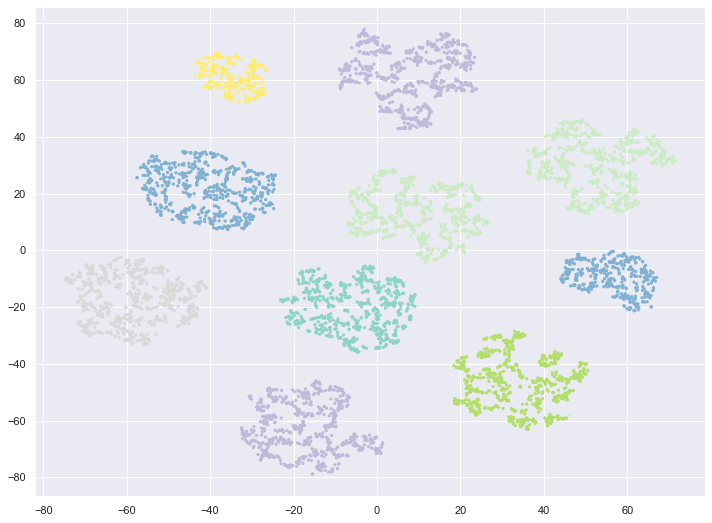

In [26]:
data_x = data_x_y[:, 0]
data_y = data_x_y[:, 1]

plt.figure(figsize=(12,9))
plt.scatter(data_x, data_y, c=cluster_labels, cmap ='Set3', s=5)
# plt.scatter(data_x, data_y, c=y_blobs, s=1, cmap ='Set3')
# plt.legend(cluster_labels)
plt.show()

### PCA

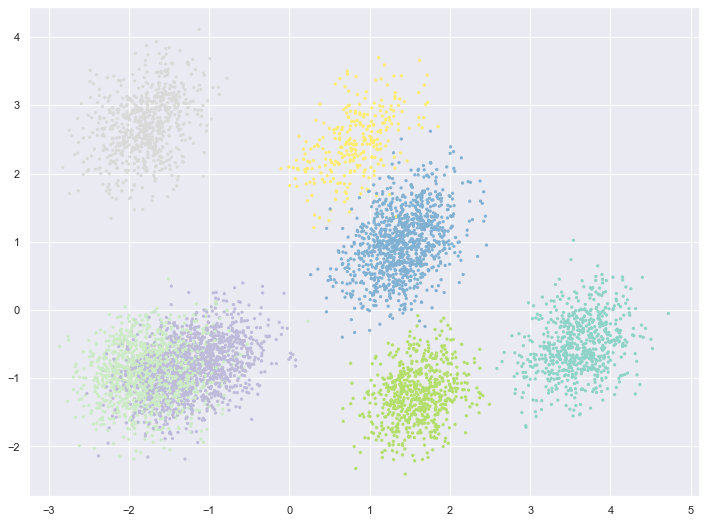

In [27]:
data_x_pca = data_x_y_pca[:, 0]
data_y_pca = data_x_y_pca[:, 1]

plt.figure(figsize=(12,9))
plt.scatter(data_x_pca, data_y_pca, c=cluster_labels, cmap ='Set3', s=5)
# plt.scatter(data_x, data_y, c=y_blobs, s=1, cmap ='Set3')
# plt.legend(cluster_labels)
plt.show()

**PCA работает быстрее, но разделяет хуже**

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**